<a href="https://colab.research.google.com/github/AHNDUHONG/gogle_drive/blob/main/temp/Chapter_6_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PCA
- 차원축소의 개념 : 일부 특성을 선택하여 데이터 크기를 줄임
  + 머신러닝 측면: 과대적합 방지 & 성능 향상
- PCA 개념
- 과일 사진의 경우, 10,000개의 픽셀 (높이 x 너비)
  + 10,000개의 특성이 있는 셈 (차원)
- 정형데이터에서도 활용 가능
  + 문자열 데이터, 수치형 데이터 (연속형 데이터, 비연속형 데이터)
  + 캐글 대회 : 수치형 데이터 304개
    + 연산은 RAM에서 처리, 데이터가 많기 때문에 연산량이 많아져 RAM이 과부하가 오기때문에 차원축소를 한다.

- 양적 데이터 사이의 분산-공분산 관계를 이용해서 선형결합으로 표시되는 주성분을 찾음
- 2-3개의 주성분으로 전체 변동을 찾는것이 PCA

p 326
- 그래프를 보면, 처음 10개의 주성분이 (10,000개의 픽셀)

알고리즘 구성 할 때, 필요한 데이터 픽셀 수, 300 X 10,000개 픽셀
- 300 X PCA 10주 성분으로 줄임
- 기존 1시간 걸림 / 10분 걸림
- 그럼에도 불구하고 분류가 더 잘 됨

# PCA 클래스


In [ ]:
## 데이터 불러오기

In [ ]:
!wget https://bit.ly/fruits_300_data -O fruits_300.npy

--2022-03-31 06:17:08--  https://bit.ly/fruits_300_data
Resolving bit.ly (bit.ly)... 67.199.248.11, 67.199.248.10
Connecting to bit.ly (bit.ly)|67.199.248.11|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy [following]
--2022-03-31 06:17:08--  https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy
Resolving github.com (github.com)... 140.82.114.4
Connecting to github.com (github.com)|140.82.114.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy [following]
--2022-03-31 06:17:08--  https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... conne

- 배열로 업로드

In [ ]:
import numpy as np
fruits = np.load('fruits_300.npy')
fruits_2d = fruits.reshape(-1, 100 * 100)
fruits_2d.shape

(300, 10000)

- sklearn.decomposition 모듈

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 50)

# PCA 50개 성분으로 300 X 10,000개의 픽셀 값을 압축
pca.fit(fruits_2d)

PCA(n_components=50)

In [ ]:
print(pca.components_.shape)

(50, 10000)


- 그래프 그리기

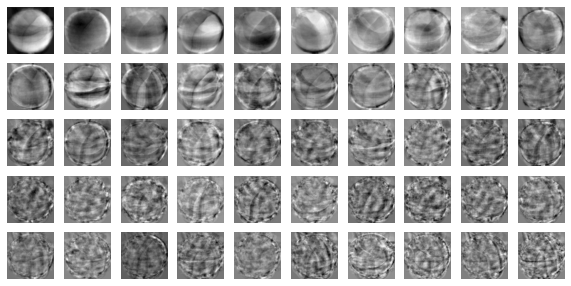

In [ ]:
import matplotlib.pyplot as plt

def draw_fruits(arr, ratio=1):
    n = len(arr)    # n은 샘플 개수입니다
    # 한 줄에 10개씩 이미지를 그립니다. 샘플 개수를 10으로 나누어 전체 행 개수를 계산합니다. 
    rows = int(np.ceil(n/10))
    # 행이 1개 이면 열 개수는 샘플 개수입니다. 그렇지 않으면 10개입니다.
    cols = n if rows < 2 else 10
    fig, axs = plt.subplots(rows, cols, 
                            figsize=(cols*ratio, rows*ratio), squeeze=False)
    for i in range(rows):
        for j in range(cols):
            if i*10 + j < n:    # n 개까지만 그립니다.
                axs[i, j].imshow(arr[i*10 + j], cmap='gray_r')
            axs[i, j].axis('off')
    plt.show()

draw_fruits(pca.components_.reshape(-1, 100, 100))

- 원 데이터의 크기에 대비해서 1/200 줄임(용량이 줌)

In [ ]:
fruits_pca = pca.transform(fruits_2d) # 10,000 개의 픽셀을 50으로 압축
print(fruits_pca.shape)

(300, 50)


# 원본 데이터 재구성
- 10,000개의 특성을 50개로 줄임
- 100% 재구성은 어렵지만, 그래도 쓸만하다.

In [ ]:
fruits_inverse = pca.inverse_transform(fruits_pca)
print(fruits_inverse.shape)

(300, 10000)


In [ ]:
fruits_reconstruct = fruits_inverse.reshape(-1, 100, 100)
print(fruits_reconstruct.shape)

(300, 100, 100)


- 그래프 작성

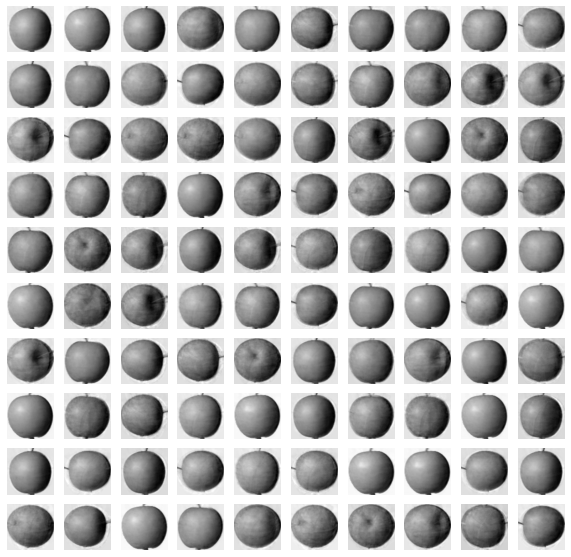

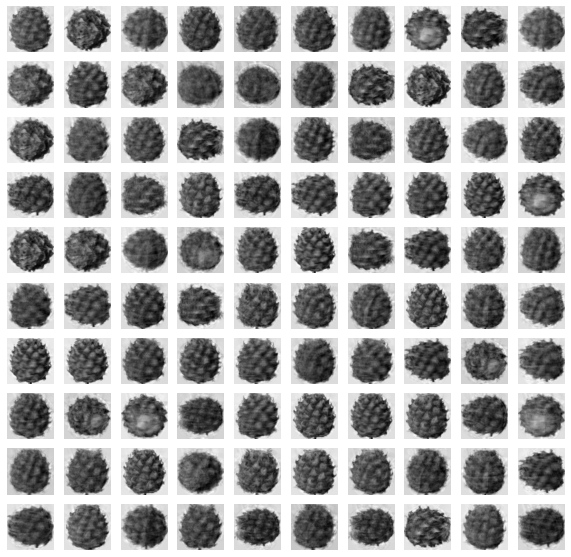

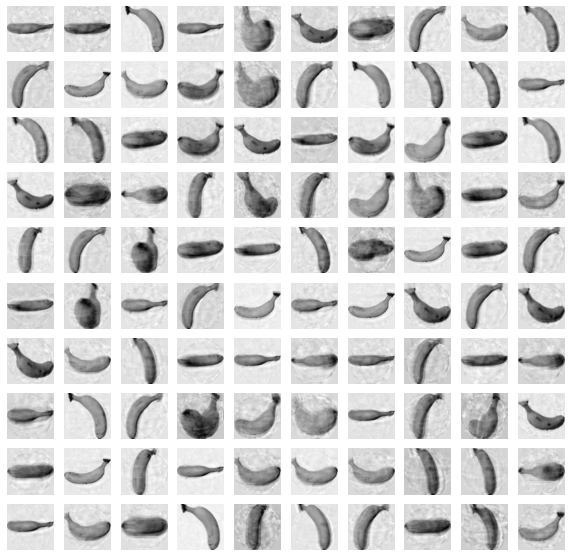

In [ ]:
for start in [0, 100, 200]:
  draw_fruits(fruits_reconstruct[start:start + 100])
  print("\n")

# 설명된 분산


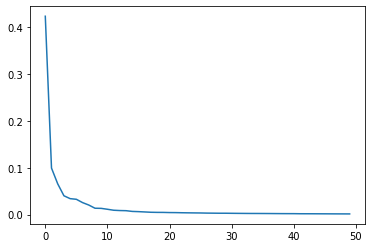

In [ ]:
plt.plot(pca.explained_variance_ratio_)
plt.show()

- 처음 10개의 주성분이 대부분의 분산을 표현한다.
- 11개 주성분부터 ~ 50개까지는 잘 설명이 안됨

In [ ]:
print(np.sum(pca.explained_variance_ratio_))

0.9214959498168352


# 다른 알고리즘과 함께 사용하기
- 3개의 과일 사진 분류 위해 로지스틱 회귀

In [ ]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

# 타깃값 생성
target = np.array([0] * 100 + [1] * 100 + [2] * 100)
print(target)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2]


- 교차검증 진행

In [ ]:
from sklearn.model_selection import cross_validate
scores = cross_validate(lr, fruits_2d, target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))

0.9966666666666667
1.5046438217163085


- PCA 수행 후, 학습 시간 비교

In [ ]:
scores = cross_validate(lr, fruits_pca, target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))

1.0
0.03905963897705078


- 주 성분의 매개변수 개수 지정, 분산비율 지정

In [ ]:
pca = PCA(n_components = 0.5)
pca.fit(fruits_2d)
print(pca.n_components_)

2


- 주성분을 2개로 압축을 시킴

In [ ]:
fruits_pca = pca.transform(fruits_2d)
print(fruits_pca.shape)

(300, 2)


In [ ]:
scores = cross_validate(lr, fruits_pca, target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))

0.9933333333333334
0.041806697845458984


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


- 차원 축소된 데이터를 K - 평균 알고리즘에 추가한다

In [ ]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters = 3, random_state = 42)
km.fit(fruits_pca)
print(np.unique(km.labels_, return_counts = True))

(array([0, 1, 2], dtype=int32), array([110,  99,  91]))


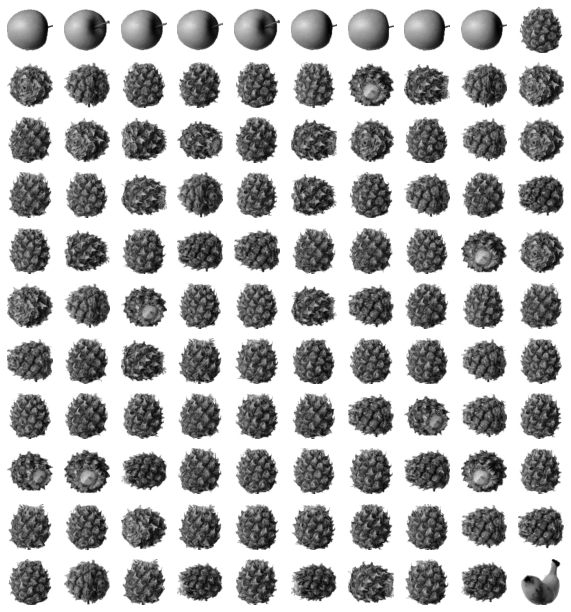

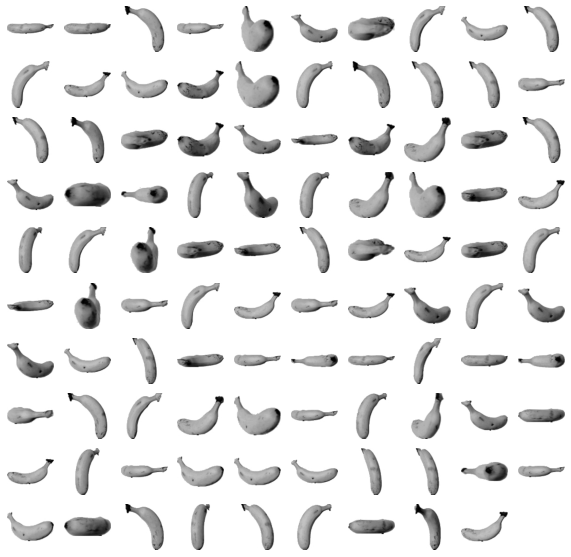

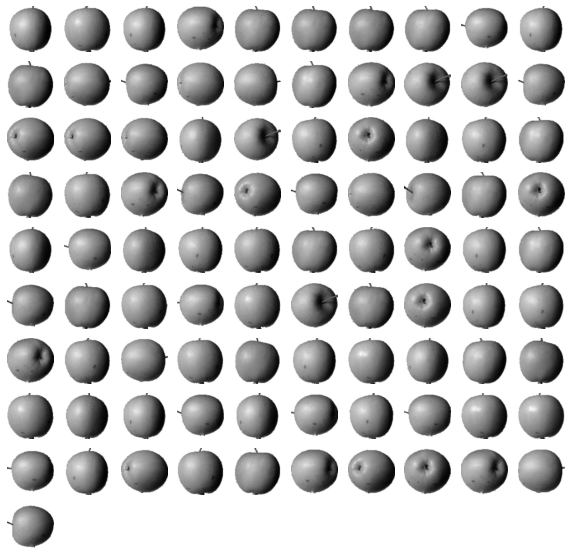

In [ ]:
for label in range(0, 3):
  draw_fruits(fruits[km.labels_ == label])
  print("\n")

- 시각화로 뿌려주기

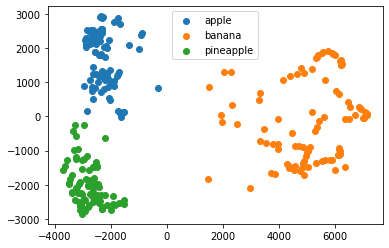

In [ ]:
for label in range(0, 3):
  data = fruits_pca[km.labels_ == label]
  plt.scatter(data[:, 0], data[:, 1])
plt.legend(['apple', 'banana', 'pineapple'])
plt.show()